# Figuring out Convolutions

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.use("pgf")
%matplotlib inline
plt.plot([1, 2, 3])
mpl.use("pgf")
mpl.rcParams.update(
    {
        "pgf.texsystem": "lualatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "pgf.preamble": "\n".join(
            [
                r"\usepackage{bm}",
                r"\usepackage{mathtools}",
                r"\usepackage{amsmath}",
                r"\DeclarePairedDelimiter\abs{\lvert}{\rvert}%",
                r"\DeclarePairedDelimiter\norm{\lVert}{\rVert}",
                r"\makeatletter",
                r"\let\oldabs\abs",
                r"\def\abs{\@ifstar{\oldabs}{\oldabs*}}",
                r"\let\oldnorm\norm",
                r"\def\norm{\@ifstar{\oldnorm}{\oldnorm*}}",
                r"\makeatother",
                r"\usepackage[dvipsnames]{xcolor}", 
                r"\definecolor{myred}{RGB}{205, 108, 46}",
            ]
        ),
        "font.serif": ["Computer Modern Roman"],
    }
)

import matplotlib.font_manager
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import Divider, Size, make_axes_locatable
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d
import matplotlib.cm as cm

import numpy as np
import scipy as sc
import scipy.io as io
from scipy.stats import multivariate_normal
from functools import partial

import jax.numpy as jnp
import jax.scipy as jsc
from jax import grad, jit, vmap, random, lax, value_and_grad, tree_multimap, tree_map

In [3]:
from jax.config import config
config.update("jax_enable_x64", True)

In [4]:
key = random.PRNGKey(1)
key, *subkeys = random.split(key, 4)

In [5]:
# Time resolution
time_bin = 0.005

In [6]:
subkeyx = subkeys[-1]

# Time horizon for input data
x_maxt = 2.0
x_maxn = 3.0

# Maximum index of input data
k = np.floor(x_maxt/time_bin).astype(np.int64)
knew = np.floor(x_maxn/time_bin).astype(np.int64)

xtime = np.linspace(0.0, x_maxt, k + 1)
xtimen = np.linspace(0.0, x_maxn, knew + 1)

xtest = random.bernoulli(subkeyx, 0.001, (k+1,)).astype(np.float64)
xtestn = np.append(xtest, random.bernoulli(subkeyx, 0.01, (knew - k,)).astype(np.float64) )

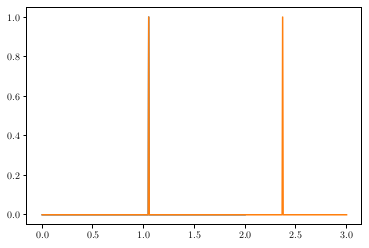

In [7]:
plt.plot(xtime, xtest)
plt.plot(xtimen, xtestn)

In [8]:
subkeyf = subkeys[-2]

# Filter horizon
f_maxt = 0.25

# Maximum index of filter data
n = np.floor(f_maxt/time_bin).astype(np.int64)
ftime = np.linspace(0.0, f_maxt, n + 1)
ftrue = np.zeros(n + 1,)
ftrue = np.where(ftime >= 0.05, np.exp(-70 * (ftime - 0.05)), 0.0)

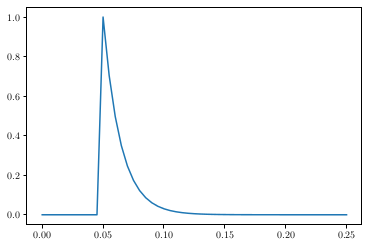

In [9]:
plt.plot(ftime, ftrue)

In [10]:
y1 = np.convolve(xtest, ftrue)[: k + 1]
ytime = np.linspace(0.0, xtime[-1] + ftime[-1], n + k + 1)[: k + 1]

ynew = np.convolve(xtestn, ftrue)[:knew + 1]
ytimen = np.linspace(0.0, xtimen[-1] + ftime[-1], n + knew + 1)[: knew + 1]

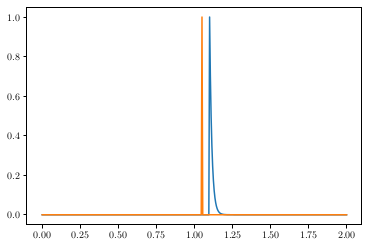

In [11]:
plt.plot(ytime, y1)
plt.plot(xtime, xtest)
# plt.xlim((1.0, 1.2))

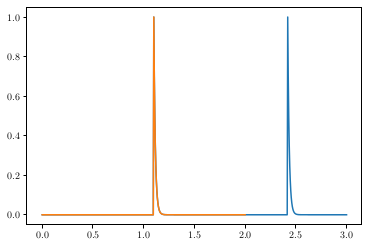

In [12]:
plt.plot(ytimen, ynew)
plt.plot(ytime, y1)

(401,)


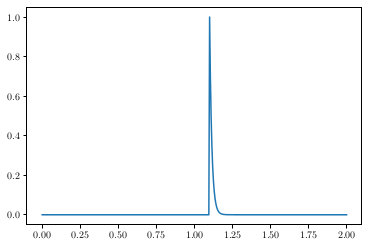

In [22]:
xpad = np.append(np.zeros(n), xtest)
print(np.shape(np.convolve(ftrue, xpad, mode='valid')))
plt.plot(ytime, np.convolve(ftrue, xpad, mode='valid'))
#plt.plot(ytime, y1)

In [1]:
from IPython.display import display, Image
display(Image(filename="img/rtt.png", embed=True))

FileNotFoundError: [Errno 2] No such file or directory: 'img/rtt.png'